# Row Health Campaign Performance | Summary of Insights

#### A) <ins>*Plan:Signups Analysis*</ins>
1. 24 campaigns did not have any associated customers.
2. The 'Silver' plan unequivocally makes up the largest proportion of each campaign-type's distribution, constituting 86% of all plans.
    - In most cases (~71%), this is followed by the order of: 'Gold', 'Bronze', 'Platinum'.
3. The following campaigns (in descending order) have the highest number of signups:
    - CAM031 : 3534 signups
        - Type: Product Promotion
        - Category: #CoverageMatters
    - CAM018 : 3279 signups
        - Type: Health Awareness
        - Category: Health For All
    - CAM030 : 2743 signups
        - Type: Policy Information
        - Category: #HealthyLiving
    - CAM004 : 1546 signups
        - Type: Customer Testimonial
        - Category: Compare Health Coverage
    - CAM006 : 1273 signups
        - Type: Product Promotion
        - Category: Compare Health Coverage

#### B) <ins>*Cost:Signups Analysis*</ins>
1. The top 5 highest-signup campaigns have an avg. cost-per-signup of \\$0.59; 199% less than the overall avg. of \\$203.91.
    - 'Covid Awareness' & 'Offer Announcement' have the two largest average cost-per-signup, at \\$537.25 and \\$411.94 respectively - surpassing the overall average of \\$203.91. 'Covid Awareness' being 2nd in highest-costing campaign types, at \\$6.6K; 'Offer Announcement' in 5th, at \\$4.2K.
    - 7 Campaigns (21.2%) are above the avg. cost/signup
    - 26 Campaigns (78.8%) are below the avg. cost/signup
    - *'Customer Testimonial' is the top-rank for campaign cost with a total of \\$7.2K; 4th in total number of signups.*
2. There is no significant relationship between the cost of a campaign and the subsequent number of signups.

#### C) <ins>*Claims Analysis*</ins>
1. Overall, campaigns of type 'Customer Testimonial' encapsulate the highest avg. claim amounts, at \\$457.35. This is followed by 'Policy Information' and 'Product Promotion', at \\$248.57 & \\$236.55, respectively.
    - Digging deeper into the association of campaign types with categories, the following groupings have above average (> \\$267.43) claim amounts:
        - Customer Testimonial : Compare Health Coverage
        - Covid Awareness : Compare Health Coverage
        - Health Tips : Tailored Health Plans
        - Customer Testimonial : Preventive Care News
        - Covid Awareness : #InsureYourHealth
2. Of the top 10 type:category groupings with the highest *total* claim amounts, 80% fall *below* the average claim-cost. Those that do not *(having above avg. claim-cost)*:
    - Customer Testimonial : Compare Health Coverage *(Ranked 1st)*
    - Customer Testimonial : Preventive Care News *(Ranked 9th)*
3. The YoY frequency of 'Offer Announcement' is consistent with a low number of claims, while 'Health Awareness' has the highest. Interestingly, 'Health Awareness' comprises 20.842% of campaign types *(2nd behind 'Product Promotion')*, yet has the highest frequency of claims made, leaving 'Product Promotion' in 2nd.
4. There is a general uptick in claims throughout 2019-2021 amongst campaigns, likely due to the inception of the COVID-19 pandemic.
5. ***Note: MoM calculations/visualizations are aggregates of all years contained within datset (2019-2023)*** </br>
Amongst most campaign types, there is an observable pattern of increase in claims during the Feb. &ndash; March timeframe. Within a more focused view of campaign categories, there is an observable decrease during the May &ndash; July timeframe - also observed in the top 5 campaigns with the highest signup. Interestingly, this pattern doesn't seem to hold true for the top 5 highest-costing campaigns.

#### D) <ins>*CTR & Signup Rate Analysis*</ins>
1. 60% (3/5) of the top 5 highest-signup campaigns, have above average CTRs. Those being:
    - CAM018, CAM004, CAM006
2. ~36% of campaign type:category groupings have above average CTRs.
3. There is no observable correlation between CTR and subsequent number of signups.
    - Notably, when inquiring into campaign types, there is a focused concentration of signups within the CTR range of .05 &ndash; .15.

### <ins>Recommendations</ins>
1. Investigate why customers are primarily opting for the 'Silver' plan, over other choices.
    - *What criterion encourage a customer to select a specific plan - monthly costs, deductibles, etc.?*
2. Reduce campaigns related to type 'Covid Awareness', and reallocate funds to more lucrative types.
    - 'Product Promotion' can be considered as an option for receiving reallocated funds, as this type currently has the highest number of signups, and is associated with below avg. claim amounts.
    - 'Health Awareness' can be considered as an option for receiving reallocated funds, as this is 2nd in total signups; however, this will likely result in a large/increased number of claims associated with this type.
3. Consider reducing 'Health Awareness' campaigns, as this is associated with a higher frequency of claims made - if the goal is to reduce campaigns that are indicative of, or associated with, subsequent high claims.
    - *More investigation into the categorical associations with this type is recommended - if reducing campaigns of this type is considered - as 2/3 of its categorical associations have an above average click through rate.*
6. Advise including any data the Marketing team may have on the start/end timestamps of campaigns, allowing for a more robust historical analysis.
7. Investigate contributing factors of the top 5 highest-costing not following the pattern of decreases in claims during the May &ndash; July timeframe.
8. Discussions with the Data Engineering and/or Marketing team to understand validity of no customer signups being attributed to 24 campaigns.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Parsing Kaggle-Hosted Data

In [2]:
# reading in whole xlsx file
raw_df = pd.ExcelFile('/kaggle/input/row-health-data/row-health-data')
# DF for 'customers' worksheet
raw_customers_df = pd.read_excel(raw_df, 'customers')
# DF for 'claims' worksheet
raw_claims_df = pd.read_excel(raw_df, 'claims')
# DF for 'campaigns' worksheet
raw_campaigns_df = pd.read_excel(raw_df, 'campaigns')

#### Parsing Local-Hosted Data

In [3]:
# # reading in whole xlsx file
# raw_df = pd.ExcelFile('~/projects/row-health/row-health-data')
# # DF for 'customers' worksheet
# raw_customers_df = pd.read_excel(raw_df, 'customers')
# # DF for 'claims' worksheet
# raw_claims_df = pd.read_excel(raw_df, 'claims')
# # DF for 'campaigns' worksheet
# raw_campaigns_df = pd.read_excel(raw_df, 'campaigns')

# Initial EDA

## *Customers* Initial Analysis

In [4]:
raw_customers_df.head()

,customer_id,first_name,last_name,state,first_touch,plan,signup_date,campaign_id
0,c1,Yetta,Richardson,NJ,social,gold,2019-01-01,CAM030
1,c10,Paul,Pulliam,NJ,social,gold,2019-01-05,CAM030
2,c100,Jennifer,Jackson,ND,social,silver,2019-01-27,CAM018
3,c1000,Bradley,Patino,NJ,social,silver,2020-04-29,CAM031
4,c10000,Brian,Pugh,IA,referral,silver,2021-02-03,unknown


In [5]:
raw_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16338 entries, 0 to 16337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  16338 non-null  object        
 1   first_name   16338 non-null  object        
 2   last_name    16338 non-null  object        
 3   state        16338 non-null  object        
 4   first_touch  16338 non-null  object        
 5   plan         16338 non-null  object        
 6   signup_date  16338 non-null  datetime64[ns]
 7   campaign_id  16299 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 1021.2+ KB


In [6]:
# confirming num. of nulls
raw_customers_df.isna().any(axis=1).sum()

39

In [7]:
raw_customers_df.describe()

,signup_date
count,16338
mean,2021-02-17 11:29:35.541681920
min,2019-01-01 00:00:00
25%,2020-05-01 00:00:00
50%,2021-02-06 00:00:00
75%,2021-12-02 00:00:00
max,2023-07-13 00:00:00


#### NaN Handling
- Replacing NaNs with 'unknown', as this is the structure being used in other values
    - Can confirm with Data Engineering team in future, on clarification for NaNs found

In [8]:
# storing customer Nans before imputing
customer_na = raw_customers_df[raw_customers_df.campaign_id.isna()]

In [9]:
# replacing NaNs with 'unknown'
raw_customers_df['campaign_id'] = raw_customers_df.campaign_id.fillna('unknown')

In [10]:
# validating NaNs impute 
raw_customers_df.campaign_id.isna().sum()

0

#### Unique Value Checks
- For specific qualitative variables

In [11]:
raw_customers_df.columns

Index(['customer_id', 'first_name', 'last_name', 'state', 'first_touch',
       'plan', 'signup_date', 'campaign_id'],
      dtype='object')

In [12]:
# checking first_touch values
raw_customers_df.first_touch.unique()

array(['social', 'referral', 'marketplace', 'direct', 'email'],
      dtype=object)

In [13]:
# checking plan values
raw_customers_df.plan.unique()

array(['gold', 'silver', 'bronze', 'platinum'], dtype=object)

#### Variable Distributions

In [14]:
# checking distribution of first_touch values
raw_customers_df.first_touch.value_counts(normalize=True)

first_touch
social         0.580487
referral       0.340127
marketplace    0.053862
direct         0.023259
email          0.002265
Name: proportion, dtype: float64

In [15]:
# checking distribution of plan values
raw_customers_df.plan.value_counts(normalize=True)

plan
silver      0.857510
gold        0.105582
bronze      0.036173
platinum    0.000734
Name: proportion, dtype: float64

#### Duplicates

In [16]:
# checking duplicates in PK
raw_customers_df.duplicated(subset='customer_id').sum()

0

#### Creating Mergeable *Customers* DF

In [17]:
# storing unknown campaign_ids
unknown_customer_campaigns = raw_customers_df[(raw_customers_df['campaign_id'] == 'unknown')].copy()
# validating amount of unknowns
unknown_customer_campaigns.shape

(49, 8)

In [18]:
raw_customers_df.shape

(16338, 8)

In [19]:
# removing unknown campaign_ids from mergeable df
raw_customers_df = raw_customers_df[(raw_customers_df['campaign_id'] != 'unknown')].copy()

In [20]:
# validating removal of unknown campaigns
raw_customers_df.shape

(16289, 8)

#### Initial Insights | *Customers*
- campaign_id variable has 39 nulls
- data ranges from 01/2019 - 07/2023 *(signup date)*
- 8 columns
- ~16.3k records
- no duplicate records
    - including specifically in customer_id variable
- 49 records of customers with an unknown associated campaign
    - removed for merging
- 'silver' plan makes up largest proportion of distribution (.8575)
- 'social' first-touch point makes up largest proportion of distribution (.5805) 

## Claims Initial Analysis

In [21]:
raw_claims_df.head()

,customer_id,claim_id,claim_date,claim_category,claim_amount,covered_amount
0,c1,1,2019-01-09,Parenteral Nutrition Supplies,107.1,74.97
1,c10,16,2019-01-10,Parenteral Nutrition Supplies,126.0,88.20
2,c10,17,2020-01-09,Parenteral Nutrition Supplies,126.0,88.20
3,c10,18,2021-01-08,Parenteral Nutrition Supplies,126.0,88.20
4,c10,19,2022-01-08,Parenteral Nutrition Supplies,126.0,88.20


In [22]:
raw_claims_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     49998 non-null  object        
 1   claim_id        49998 non-null  int64         
 2   claim_date      49998 non-null  datetime64[ns]
 3   claim_category  49998 non-null  object        
 4   claim_amount    49998 non-null  float64       
 5   covered_amount  49998 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.3+ MB


In [23]:
raw_claims_df.describe()

,claim_id,claim_date,claim_amount,covered_amount
count,49998.000000,49998,49998.000000,49998.000000
mean,25000.109644,2021-10-10 17:41:07.250690048,267.191939,163.401728
min,1.000000,2019-01-04 00:00:00,0.000000,0.000000
25%,12500.250000,2020-12-31 00:00:00,126.000000,76.298250
50%,25000.500000,2021-11-10 00:00:00,216.000000,129.600000
75%,37499.750000,2022-08-25 00:00:00,324.000000,194.400000
max,49999.000000,2023-07-27 00:00:00,5940.000000,3564.000000
std,14433.735913,NaN,199.841865,123.962698


In [24]:
# reviewing num. of customers that made multiple claims
raw_claims_df.duplicated(subset='customer_id').sum()

33660

In [25]:
# reviewing any duplicate claim IDs
raw_claims_df.claim_id.duplicated().sum()

0

In [26]:
# records with $0 claim amount
raw_claims_df.query('claim_amount == 0')

,customer_id,claim_id,claim_date,claim_category,claim_amount,covered_amount
347,c10112,32529,2022-01-25,Radiation Therapy,0.0,0.0
1189,c10337,33243,2021-04-15,Glucose Monitoring,0.0,0.0
1259,c10360,33304,2021-05-22,Radiation Therapy,0.0,0.0
1654,c10523,33638,2021-06-30,Radiation Therapy,0.0,0.0
3922,c11231,35571,2022-10-04,Physical Therapy,0.0,0.0
...,...,...,...,...,...,...
46580,c9101,29200,2020-12-01,Mental Health Counseling,0.0,0.0
46914,c9184,29496,2021-03-09,Parenteral Nutrition Supplies,0.0,0.0
47405,c9308,29904,2021-04-26,Physical Therapy,0.0,0.0
47513,c9322,30005,2020-04-09,Infusion Therapy,0.0,0.0


#### Initial Insights | *Claims*
- ~49K records
- 6 variables
- ~33K records for customers that made multiple claims
    - *may be worth investigating any correlating factors in the types of customers that made multiple claims*
- 64 records where there was no amount listed to be claimed - resulting in no amount covered by insurance
- no NaNs :)

## Campaigns Initial Analysis

In [27]:
raw_campaigns_df.head()

,campaign_id,campaign_category,campaign_type,cost,impressions,clicks
0,CAM033,Health For All,Product Promotion,846.05,32272,0.0
1,CAM051,Health For All,Policy Information,1253.53,20437,0.0
2,CAM057,Health For All,Health Awareness,1062.21,29630,0.0
3,CAM032,Family Coverage Plan,Product Promotion,801.46,452680,NaN
4,CAM036,Golden Years Security,Covid Awareness,301.47,25492,0.0


In [28]:
raw_campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        57 non-null     object 
 1   campaign_category  57 non-null     object 
 2   campaign_type      57 non-null     object 
 3   cost               57 non-null     float64
 4   impressions        57 non-null     int64  
 5   clicks             54 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


In [29]:
# checking where 'clicks' is NULL
raw_campaigns_df[raw_campaigns_df.clicks.isna()]

,campaign_id,campaign_category,campaign_type,cost,impressions,clicks
3,CAM032,Family Coverage Plan,Product Promotion,801.46,452680,NaN
10,CAM021,Family Coverage Plan,Customer Testimonial,1606.23,449340,NaN
56,CAM025,Family Coverage Plan,Customer Testimonial,1528.73,204520,NaN


In [30]:
# checking where 'clicks' is 0
raw_campaigns_df.query('clicks == 0')

,campaign_id,campaign_category,campaign_type,cost,impressions,clicks
0,CAM033,Health For All,Product Promotion,846.05,32272,0.0
1,CAM051,Health For All,Policy Information,1253.53,20437,0.0
2,CAM057,Health For All,Health Awareness,1062.21,29630,0.0
4,CAM036,Golden Years Security,Covid Awareness,301.47,25492,0.0
5,CAM041,Golden Years Security,Covid Awareness,571.72,35448,0.0
6,CAM053,Golden Years Security,Product Promotion,338.28,13480,0.0


#### Campaigns Review
- campaign_category of 'Family Coverage Plan' has NaN for clicks
    - 3 occurrences in total
    - different from rows where the 'clicks' are explicitly 0.0
    - will leave in dataset, as there are a large number of 'customers' records corresponding to the foregoing campaigns

## Merge DataFrames
- Merged DF to be used where applicable, for appropriate aggregations
    - In situations where it is not appropriate to aggregate data within merged DF (e.g., CTR) for avoiding inflation of numbers, raw DFs & distinct combinations (e.g., Customers-Campaigns) will be used.

#### Creating all-inclusive DF

In [31]:
# merge `customers` & `claims` dataframes
combined_df = raw_customers_df.merge(raw_claims_df, how='inner', on='customer_id').copy()

In [32]:
# merge combined df with `campaigns`
combined_df = combined_df.merge(raw_campaigns_df, how='inner', on='campaign_id').copy()

In [33]:
# merge validation
combined_df.head()

,customer_id,first_name,last_name,state,first_touch,plan,signup_date,campaign_id,claim_id,claim_date,claim_category,claim_amount,covered_amount,campaign_category,campaign_type,cost,impressions,clicks
0,c1,Yetta,Richardson,NJ,social,gold,2019-01-01,CAM030,1,2019-01-09,Parenteral Nutrition Supplies,107.1,74.97,#HealthyLiving,Policy Information,1362.21,110700,13040.0
1,c10,Paul,Pulliam,NJ,social,gold,2019-01-05,CAM030,16,2019-01-10,Parenteral Nutrition Supplies,126.0,88.20,#HealthyLiving,Policy Information,1362.21,110700,13040.0
2,c10,Paul,Pulliam,NJ,social,gold,2019-01-05,CAM030,17,2020-01-09,Parenteral Nutrition Supplies,126.0,88.20,#HealthyLiving,Policy Information,1362.21,110700,13040.0
3,c10,Paul,Pulliam,NJ,social,gold,2019-01-05,CAM030,18,2021-01-08,Parenteral Nutrition Supplies,126.0,88.20,#HealthyLiving,Policy Information,1362.21,110700,13040.0
4,c10,Paul,Pulliam,NJ,social,gold,2019-01-05,CAM030,19,2022-01-08,Parenteral Nutrition Supplies,126.0,88.20,#HealthyLiving,Policy Information,1362.21,110700,13040.0


In [34]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49866 entries, 0 to 49865
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        49866 non-null  object        
 1   first_name         49866 non-null  object        
 2   last_name          49866 non-null  object        
 3   state              49866 non-null  object        
 4   first_touch        49866 non-null  object        
 5   plan               49866 non-null  object        
 6   signup_date        49866 non-null  datetime64[ns]
 7   campaign_id        49866 non-null  object        
 8   claim_id           49866 non-null  int64         
 9   claim_date         49866 non-null  datetime64[ns]
 10  claim_category     49866 non-null  object        
 11  claim_amount       49866 non-null  float64       
 12  covered_amount     49866 non-null  float64       
 13  campaign_category  49866 non-null  object        
 14  campai

In [35]:
# validating campaigns merged - 24 dropped 
combined_df.campaign_id.nunique()

33

In [36]:
# reviewing NaNs for 'Family Coverage Plan'
combined_df[(combined_df.clicks.isna()) & (combined_df['campaign_category'] == 'Family Coverage Plan')].count()

customer_id          1266
first_name           1266
last_name            1266
state                1266
first_touch          1266
plan                 1266
signup_date          1266
campaign_id          1266
claim_id             1266
claim_date           1266
claim_category       1266
claim_amount         1266
covered_amount       1266
campaign_category    1266
campaign_type        1266
cost                 1266
impressions          1266
clicks                  0
dtype: int64

#### Post-Merge Considerations
- 1266 NaN for `clicks` due to association with `customers` records for the *Family Coverage Plan* `campaign_category`
- 24 campaigns dropped due to no associated customer data

#### Creating Customers-Campaigns DF
- Specifically for merging `Customers` & `Campaigns`, to avoid inflation of numbers caused by including `Claims` data.

In [37]:
# creating combined dataframe of customers & campaigns
customer_camp_df = raw_customers_df.merge(raw_campaigns_df, how='inner', on='campaign_id').copy()

In [38]:
# validating shape & previewing data
print(customer_camp_df.shape)
customer_camp_df.head()

(16289, 13)


,customer_id,first_name,last_name,state,first_touch,plan,signup_date,campaign_id,campaign_category,campaign_type,cost,impressions,clicks
0,c1,Yetta,Richardson,NJ,social,gold,2019-01-01,CAM030,#HealthyLiving,Policy Information,1362.21,110700,13040.0
1,c10,Paul,Pulliam,NJ,social,gold,2019-01-05,CAM030,#HealthyLiving,Policy Information,1362.21,110700,13040.0
2,c100,Jennifer,Jackson,ND,social,silver,2019-01-27,CAM018,Health For All,Health Awareness,1185.17,88220,43453.0
3,c1000,Bradley,Patino,NJ,social,silver,2020-04-29,CAM031,#CoverageMatters,Product Promotion,806.42,374710,29645.0
4,c10001,Mary,Hull,NY,social,silver,2021-02-04,CAM030,#HealthyLiving,Policy Information,1362.21,110700,13040.0


In [39]:
# validating any duplicate customer records
customer_camp_df.customer_id.duplicated().sum()

0

# *Campaign Signup Rate & Plan Differentiation*

## 1. Which campaigns resulted in the highest number of signups?

In [40]:
# prints top 5 campaigns w/ highest customer conversion
top5_signups_df = customer_camp_df.groupby(['campaign_id', 'campaign_type', 'campaign_category'])[['signup_date']].count().rename(columns={'signup_date':'num_signups'})\
.sort_values(by='num_signups', ascending=False).head(5).reset_index()

top5_signups_df

,campaign_id,campaign_type,campaign_category,num_signups
0,CAM031,Product Promotion,#CoverageMatters,3534
1,CAM018,Health Awareness,Health For All,3279
2,CAM030,Policy Information,#HealthyLiving,2743
3,CAM004,Customer Testimonial,Compare Health Coverage,1546
4,CAM006,Product Promotion,Compare Health Coverage,1273


In [41]:
# creates & returns DF sorted by campaign type:category w/ highest customer conversion
typecat_signups_df = customer_camp_df.groupby(['campaign_type', 'campaign_category'])[['signup_date']].count().rename(columns={'signup_date':'num_signups'})\
.sort_values(by='num_signups', ascending=False).reset_index()

typecat_signups_df

,campaign_type,campaign_category,num_signups
0,Product Promotion,#CoverageMatters,3535
1,Health Awareness,Health For All,3279
2,Policy Information,#HealthyLiving,2745
3,Customer Testimonial,Compare Health Coverage,1546
4,Product Promotion,Compare Health Coverage,1273
5,Health Tips,#HealthyLiving,971
6,Covid Awareness,Tailored Health Plans,965
7,Customer Testimonial,Preventive Care News,586
8,Product Promotion,Health For All,266
9,Product Promotion,#InsureYourHealth,246


In [42]:
# creates & returns DF sorted by campaign type w/ highest customer conversion
type_signups_df = customer_camp_df.groupby(['campaign_type'])[['signup_date']].count().rename(columns={'signup_date':'num_signups'})\
.sort_values(by='num_signups', ascending=False).reset_index()

type_signups_df

,campaign_type,num_signups
0,Product Promotion,5581
1,Health Awareness,3395
2,Policy Information,2987
3,Customer Testimonial,2229
4,Covid Awareness,1064
5,Health Tips,972
6,Offer Announcement,61


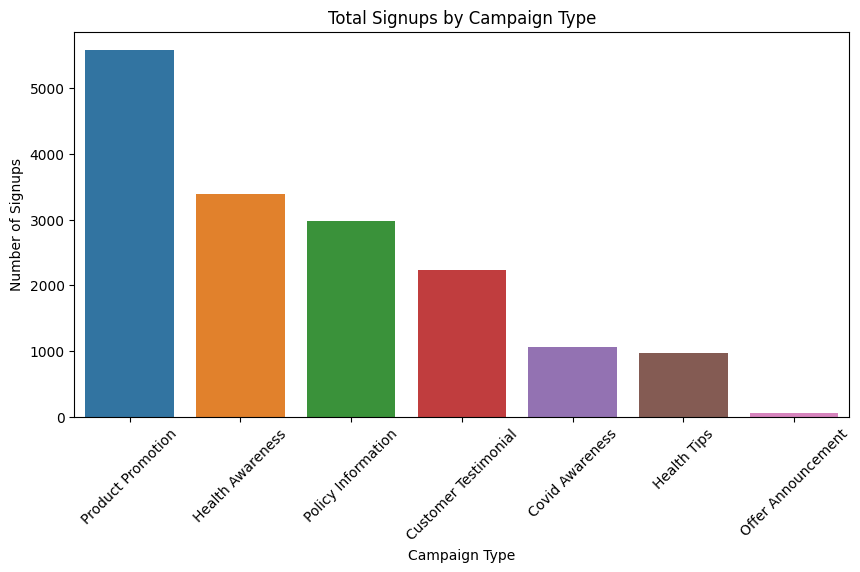

In [43]:
# bar graph of campaign signups
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(type_signups_df, x='campaign_type', y='num_signups', errorbar=None)


plt.xlabel('Campaign Type')
plt.xticks(rotation=45)
plt.ylabel('Number of Signups')
plt.title('Total Signups by Campaign Type')
plt.show()

In [44]:
# return overall proportions of campaign types 
customer_camp_df.campaign_type.value_counts(normalize=True)

campaign_type
Product Promotion       0.342624
Health Awareness        0.208423
Policy Information      0.183375
Customer Testimonial    0.136841
Covid Awareness         0.065320
Health Tips             0.059672
Offer Announcement      0.003745
Name: proportion, dtype: float64

## 2. How does the type of campaign (e.g., "Product Promotion", "Policy Information") correlate with the plan types chosen (e.g., "Gold", "Silver")?
- *Review top campaigns vs. overall*

In [45]:
# return overall plan proportions
customer_camp_df.plan.value_counts(normalize=True)

plan
silver      0.857573
gold        0.105470
bronze      0.036221
platinum    0.000737
Name: proportion, dtype: float64

In [46]:
# returns plan-type proportions for ALL campaign types
customer_camp_df.groupby(['campaign_type'])[['plan']].value_counts(normalize=True).reset_index().sort_values(by=['campaign_type', 'proportion'], ascending=False)

,campaign_type,plan,proportion
20,Product Promotion,silver,0.808278
21,Product Promotion,gold,0.176850
22,Product Promotion,bronze,0.013976
23,Product Promotion,platinum,0.000896
17,Policy Information,silver,0.923000
18,Policy Information,gold,0.066957
19,Policy Information,bronze,0.010044
15,Offer Announcement,silver,0.885246
16,Offer Announcement,gold,0.114754
11,Health Tips,silver,0.898148


In [47]:
# create df for plan proportions, grouped primarily by relative campaign 
plan_proportions_df = customer_camp_df.groupby(['campaign_id', 'campaign_type', 'campaign_category'])[['plan']].value_counts(normalize=True).reset_index()
plan_proportions_df.head()

,campaign_id,campaign_type,campaign_category,plan,proportion
0,CAM001,Covid Awareness,Tailored Health Plans,silver,0.983420
1,CAM001,Covid Awareness,Tailored Health Plans,gold,0.013472
2,CAM001,Covid Awareness,Tailored Health Plans,bronze,0.003109
3,CAM002,Customer Testimonial,Preventive Care News,bronze,0.708191
4,CAM002,Customer Testimonial,Preventive Care News,silver,0.286689


In [48]:
# merges df created for top 5 campaigns, with that of proportions
top5_plan_proportions = top5_signups_df.merge(plan_proportions_df, on='campaign_id', how='inner').copy()

#### Note
For some reason, the code below "mystically" drops the `campaign_type_y` & `campaign_type_x` columns without any telling to. The code to drop them, incase it "mystically" decides to no longer do this, is commented-out in the cell below:

In [49]:
# labels = ['campaign_type_y', 'campaign_category_y']
# drops duplicate variables
# top5_plan_proportions = top_5_plan_proportions.drop(columns=labels)

# renames original variables to remove suffix
top5_plan_proportions = top5_plan_proportions.rename(columns={'campaign_type_x' : 'campaign_type', 'campaign_category_x' : 'campaign_category'})

top5_plan_proportions.sort_values(by='num_signups', ascending=False)

,campaign_id,campaign_type,campaign_category,num_signups,campaign_type_y,campaign_category_y,plan,proportion
0,CAM031,Product Promotion,#CoverageMatters,3534,Product Promotion,#CoverageMatters,silver,0.735427
1,CAM031,Product Promotion,#CoverageMatters,3534,Product Promotion,#CoverageMatters,gold,0.250424
2,CAM031,Product Promotion,#CoverageMatters,3534,Product Promotion,#CoverageMatters,bronze,0.013016
3,CAM031,Product Promotion,#CoverageMatters,3534,Product Promotion,#CoverageMatters,platinum,0.001132
4,CAM018,Health Awareness,Health For All,3279,Health Awareness,Health For All,silver,0.966148
5,CAM018,Health Awareness,Health For All,3279,Health Awareness,Health For All,gold,0.026228
6,CAM018,Health Awareness,Health For All,3279,Health Awareness,Health For All,bronze,0.007319
7,CAM018,Health Awareness,Health For All,3279,Health Awareness,Health For All,platinum,0.000305
8,CAM030,Policy Information,#HealthyLiving,2743,Policy Information,#HealthyLiving,silver,0.934743
9,CAM030,Policy Information,#HealthyLiving,2743,Policy Information,#HealthyLiving,gold,0.054685


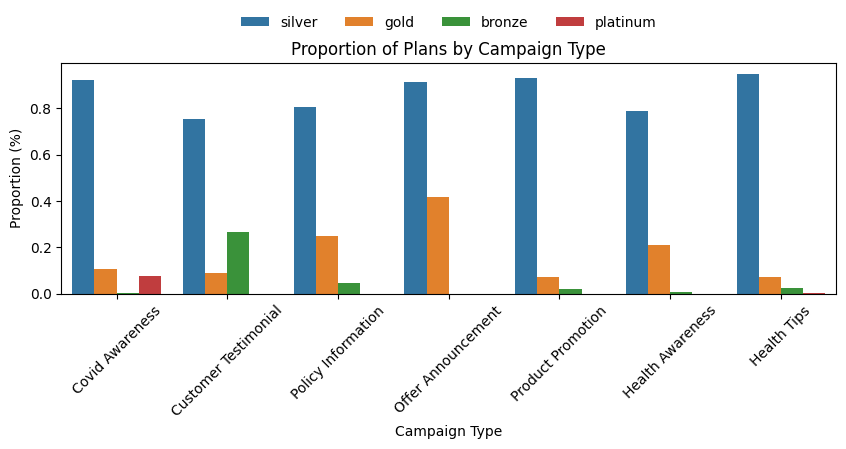

In [50]:
fig, ax = plt.subplots(figsize=(10,3))

# placing unique campaign types into a list
campaign_type_labels = plan_proportions_df.campaign_type.unique().tolist()

sns.barplot(plan_proportions_df, x='campaign_type', y='proportion', hue='plan', errorbar=None)

# making x-label readable
ax.set_xticklabels(labels=campaign_type_labels, rotation=45)

# moving legend outside of plot for readability, & adjusting 
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1.09), ncol=11, title=None, frameon=False)

plt.xlabel('Campaign Type')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Plans by Campaign Type')
plt.show()

#### Insights & Recs. (Campaigns w/ Highest Signups; Plan:Signups)

<ins>**Insights**</ins></br>
The following campaigns *(listed in descending order)* have the highest number of signups, 'Product Promotion' ranking the highest among the categories at 5581:
1. CAM031 : 3534 signups
    - Type: Product Promotion
    - Category: #CoverageMatters
2. CAM018 : 3279 signups
    - Type: Health Awareness
    - Category: Health For All
3. CAM030 : 2743 signups
    - Type: Policy Information
    - Category: #HealthyLiving
4. CAM004 : 1546 signups
    - Type: Customer Testimonial
    - Category: Compare Health Coverage
5. CAM006 : 1273 signups
    - Type: Product Promotion
    - Category: Compare Health Coverage
  
Distribution of 'plan' types to corresponding campaign-types:
1. The 'silver' plan unequivocally makes up the largest proportion (86%) of each campaign-type's distribution.
2. The hierarchical plan pattern - silver, gold, bronze, platinum - is observed in the majority of cases (71.429%); exceptions being the types (1) 'Customer Testimonial' with silver, bronze, gold, and (2) 'Covid Awareness' having platinum make up a higher proportion than bronze.
3. The foregoing plan pattern still holds true for the campaigns with the highest number of signups.

<ins>**Tracking Recs.**</ins>
- Investigate why customers are primarily opting for the 'Silver' plan, over other choices. *What criterion encourage a customer to select a specific plan - monthly costs, deductibles, etc.*
- Why there are 24 campaigns with no customer attribution

# Campaign Costs:Signups

## 1. How do campaign costs relate to the number of signups?

In [51]:
# creates df w/ relative total campaign costs
campaign_costs_df = raw_campaigns_df.groupby(['campaign_id','campaign_type','campaign_category'])[['cost']].sum().reset_index().copy()

In [52]:
# creates df w/ relative total campaign signups 
campaign_signups_df = customer_camp_df.groupby(['campaign_id','campaign_type','campaign_category'])[['signup_date']].count().reset_index()

In [53]:
# merges campaign costs & campaign signups dfs
campaign_cost_snups =  campaign_costs_df.merge(campaign_signups_df, on='campaign_id', how='inner')

In [54]:
# drop duplicate columns
campaign_cost_snups = campaign_cost_snups.drop(labels=['campaign_type_y', 'campaign_category_y'], axis=1)

# cleaning nomenclature
campaign_cost_snups = campaign_cost_snups.rename(columns={'signup_date' : 'num_signups', 'campaign_type_x' : 'campaign_type', 'campaign_category_x' : 'campaign_category'})

In [55]:
# validate shape post-merge
campaign_cost_snups.shape

(33, 5)

In [56]:
# create column for cost/signup
campaign_cost_snups['cost_per_signup'] = round((campaign_cost_snups.cost / campaign_cost_snups.num_signups), 2)

In [57]:
# calculation validation
campaign_cost_snups.head(2)

,campaign_id,campaign_type,campaign_category,cost,num_signups,cost_per_signup
0,CAM001,Covid Awareness,Tailored Health Plans,1335.57,965,1.38
1,CAM002,Customer Testimonial,Preventive Care News,1624.44,586,2.77


In [58]:
# return DF for campaign type cost-ranking
campaign_cost_snups.groupby(['campaign_type'])[['cost']].sum().sort_values(by=['cost'], ascending=False)

,cost
campaign_type,
Customer Testimonial,7248.66
Covid Awareness,6656.46
Policy Information,6568.89
Product Promotion,5401.78
Offer Announcement,4246.28
Health Awareness,3135.39
Health Tips,2223.77


In [59]:
# sorts for top 10 highest-cost campaigns 
campaign_cost_snups.sort_values(by=['cost'], ascending=False).head(10)

,campaign_id,campaign_type,campaign_category,cost,num_signups,cost_per_signup
2,CAM003,Policy Information,Preventive Care News,1944.23,46,42.27
18,CAM019,Covid Awareness,#InsureYourHealth,1872.24,46,40.70
19,CAM020,Health Tips,#HealthyLiving,1822.72,971,1.88
1,CAM002,Customer Testimonial,Preventive Care News,1624.44,586,2.77
20,CAM021,Customer Testimonial,Family Coverage Plan,1606.23,42,38.24
14,CAM015,Health Awareness,Summer Wellness Tips,1555.58,2,777.79
24,CAM025,Customer Testimonial,Family Coverage Plan,1528.73,31,49.31
4,CAM005,Offer Announcement,Golden Years Security,1519.17,1,1519.17
26,CAM027,Policy Information,Benefit Updates,1440.59,12,120.05
15,CAM016,Covid Awareness,Compare Health Coverage,1367.17,1,1367.17


In [60]:
# reviewing cost rankings of highest-signup campaigns
campaign_cost_snups.query("campaign_id in ['CAM031', 'CAM018', 'CAM030', 'CAM004', 'CAM006']")

,campaign_id,campaign_type,campaign_category,cost,num_signups,cost_per_signup
3,CAM004,Customer Testimonial,Compare Health Coverage,1354.94,1546,0.88
5,CAM006,Product Promotion,Compare Health Coverage,1254.29,1273,0.99
17,CAM018,Health Awareness,Health For All,1185.17,3279,0.36
29,CAM030,Policy Information,#HealthyLiving,1362.21,2743,0.50
30,CAM031,Product Promotion,#CoverageMatters,806.42,3534,0.23


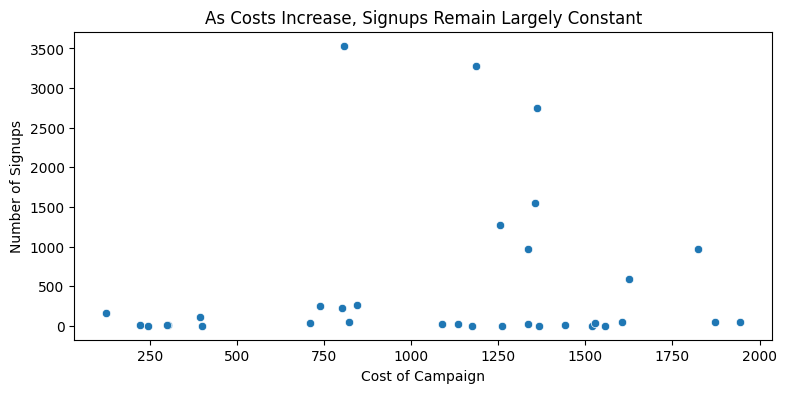

In [61]:
# visualizing cost:signup correlation 
fig, ax = plt.subplots(figsize=(9,4))
sns.scatterplot(campaign_cost_snups, x='cost', y='num_signups')

plt.title('As Costs Increase, Signups Remain Largely Constant')
plt.xlabel('Cost of Campaign')
plt.ylabel('Number of Signups')
plt.show()

In [62]:
# creates df isolating top 5 highest-signup campaigns
top5_campaign_cost_snups = campaign_cost_snups.query("campaign_id in ['CAM031', 'CAM018', 'CAM030', 'CAM004', 'CAM006']")\
.sort_values(by=['num_signups'], ascending=False)

In [63]:
# stores avg. cost/signup of top 5 highest-signup campaigns
top5_avg_cost_snup = top5_campaign_cost_snups.cost_per_signup.mean()

# returns overall avg. cost/signup
avg_cost_snup = campaign_cost_snups.cost_per_signup.mean()
avg_cost_snup

print(f'Overall Campaign Avg. Cost/Signup: {avg_cost_snup:.4f}')
print(f'Top 5 Campaigns Avg. Cost/Signup: {top5_avg_cost_snup:.4f}')

Overall Campaign Avg. Cost/Signup: 203.9139
Top 5 Campaigns Avg. Cost/Signup: 0.5920


In [64]:
# calculate percent difference in overall campaign avg. vs. top 5 highest-signup
diff = avg_cost_snup - top5_avg_cost_snup
avg = (avg_cost_snup + top5_avg_cost_snup) / 2
diff/avg

1.988420874195548

In [65]:
# stores & returns campaigns above the overall avg. cost/signup
above_avg_costsnup_df = campaign_cost_snups[(campaign_cost_snups.cost_per_signup > avg_cost_snup)]
above_avg_costsnup_df.head()

,campaign_id,campaign_type,campaign_category,cost,num_signups,cost_per_signup
4,CAM005,Offer Announcement,Golden Years Security,1519.17,1,1519.17
6,CAM007,Policy Information,#HealthyLiving,1173.59,2,586.79
11,CAM012,Product Promotion,#CoverageMatters,244.01,1,244.01
14,CAM015,Health Awareness,Summer Wellness Tips,1555.58,2,777.79
15,CAM016,Covid Awareness,Compare Health Coverage,1367.17,1,1367.17


In [66]:
# stores & returns campaigns below the overall avg. cost/signup
below_avg_costsnup_df = campaign_cost_snups[(campaign_cost_snups.cost_per_signup < avg_cost_snup)]
below_avg_costsnup_df.head()

,campaign_id,campaign_type,campaign_category,cost,num_signups,cost_per_signup
0,CAM001,Covid Awareness,Tailored Health Plans,1335.57,965,1.38
1,CAM002,Customer Testimonial,Preventive Care News,1624.44,586,2.77
2,CAM003,Policy Information,Preventive Care News,1944.23,46,42.27
3,CAM004,Customer Testimonial,Compare Health Coverage,1354.94,1546,0.88
5,CAM006,Product Promotion,Compare Health Coverage,1254.29,1273,0.99


In [67]:
# return distribution of averages
print(f'Campaigns Above Overall Average Cost/Signup: {above_avg_costsnup_df.shape[0]}, {above_avg_costsnup_df.shape[0] / campaign_cost_snups.shape[0] * 100:.1f}% of campaigns')
print(f'Campaigns Below Overall Average Costs/Signup: {below_avg_costsnup_df.shape[0]}, {below_avg_costsnup_df.shape[0] / campaign_cost_snups.shape[0] * 100:.1f}% of campaigns')

Campaigns Above Overall Average Cost/Signup: 7, 21.2% of campaigns
Campaigns Below Overall Average Costs/Signup: 26, 78.8% of campaigns


In [68]:
# store campaigns sorted by ascending cost/signup
lwst_cost_snup = campaign_cost_snups.sort_values(by=['cost_per_signup'], ascending=True).copy().reset_index(drop=True)

In [69]:
# used to determine cost/signup ranking of top 5 highest-signup campaigns in overall campaigns
lwst_cost_snup.query("campaign_id in ['CAM018', 'CAM031', 'CAM030', 'CAM004', 'CAM006']")

,campaign_id,campaign_type,campaign_category,cost,num_signups,cost_per_signup
0,CAM031,Product Promotion,#CoverageMatters,806.42,3534,0.23
1,CAM018,Health Awareness,Health For All,1185.17,3279,0.36
2,CAM030,Policy Information,#HealthyLiving,1362.21,2743,0.50
4,CAM004,Customer Testimonial,Compare Health Coverage,1354.94,1546,0.88
5,CAM006,Product Promotion,Compare Health Coverage,1254.29,1273,0.99


In [70]:
# return DF for campaign type cost-ranking
campaign_cost_snups.groupby(['campaign_type'])[['cost']].sum().sort_values(by=['cost'], ascending=False)

,cost
campaign_type,
Customer Testimonial,7248.66
Covid Awareness,6656.46
Policy Information,6568.89
Product Promotion,5401.78
Offer Announcement,4246.28
Health Awareness,3135.39
Health Tips,2223.77


In [71]:
# average cost-per-signup by campaign type
lwst_cost_snup.groupby(['campaign_type'])[['cost_per_signup']].mean().sort_values(by=['cost_per_signup'], ascending=False)

,cost_per_signup
campaign_type,
Covid Awareness,537.248000
Offer Announcement,411.942500
Health Awareness,260.536667
Health Tips,201.465000
Policy Information,113.668571
Product Promotion,39.495714
Customer Testimonial,27.692000


In [72]:
# average cost-per-signup by campaign type:category
lwst_cost_snup.groupby(['campaign_type','campaign_category'])[['cost_per_signup']].mean().sort_values(by=['cost_per_signup'])

cost_per_signup
campaign_type        campaign_category                       
Health Awareness     Health For All                     0.360
Policy Information   Summer Wellness Tips               0.780
Customer Testimonial Compare Health Coverage            0.880
Product Promotion    Compare Health Coverage            0.990
Covid Awareness      Tailored Health Plans              1.380
Health Tips          #HealthyLiving                     1.880
Customer Testimonial Preventive Care News               2.770
Product Promotion    #InsureYourHealth                  3.000
                     Health For All                     3.180
Health Awareness     Tailored Health Plans              3.460
Product Promotion    Family Coverage Plan               3.520
Covid Awareness      Affordable Plans                  16.090
Product Promotion    Benefit Updates                   21.540
Policy Information   Affordable Plans                  25.010
Offer Announcement   #HealthyLiving                    27.620
Policy Information   Preventive Care News              31.275
Offer Announcement   Tailored Health Plans             40.340
Covid Awareness      #InsureYourHealth                 40.700
Customer Testimonial Family Coverage Plan              43.775
                     #InsureYourHealth                 47.260
Policy Information   Benefit Updates                  120.050
Product Promotion    #CoverageMatters                 122.120
Policy Information   #HealthyLiving                   293.645
Health Tips          Tailored Health Plans            401.050
Health Awareness     Summer Wellness Tips             777.790
Offer Announcement   Golden Years Security            789.905
Covid Awareness      #CoverageMatters                1260.900
                     Compare Health Coverage         1367.170

#### Insights & Recs. (Costs:Signups)
1. The top 5 highest-signup campaigns are dispersed in placement, when comparing the costs of all campaigns.
    - There is no indication of significant correlation between campaign costs & customer signup; as costs increase, signups remain largely constant.
    - However, the avg. cost-per-signup for these campaigns (\\$0.59) fall significantly lower (~199%) than the overall average of \\$203.91.
</br></br>
2. Campaign Avg. cost/signup:
    - 7 Campaigns (21.2%) are above the avg. cost/signup
    - 26 Campaigns (78.8%) are below the avg. cost/signup

<ins>**Tracking Recs.**</ins>
1. Advise including any data the Marketing team may have on the start/end timestamps of campaigns (e.g., allowing for more robust historical analysis).

# *Claims by Campaign Type/Category*

## 1. Do customers acquired through certain campaign type:category have higher average claim amounts?

<ins>*Notes/Thoughts*</ins>
1. group by campaigns `campaign_category`
    - calculate avg. claim amount
    - investigate total # of claims
    - investigate total `claim_amount`  price differentiation
    - investigate total `covered_amount`  price differentiation
    - investigate `claim_amount`  vs `covered_amount`  differentiation, among categories

In [73]:
# calculate overall avg. claim amount
avg_overall_claim = combined_df.claim_amount.mean()
print(f'Overall Avg. Claim Amount: {avg_overall_claim:.2f}')

Overall Avg. Claim Amount: 267.43


In [74]:
# return DF to see avg. claim amount by campaign type
combined_df.groupby(['campaign_type'])[['claim_amount']].mean()\
.rename(columns={'claim_amount':'avg_claim_amount'}).sort_values(by=['avg_claim_amount'], ascending=False).reset_index()

,campaign_type,avg_claim_amount
0,Customer Testimonial,457.346182
1,Policy Information,248.574763
2,Product Promotion,236.545392
3,Health Awareness,230.567260
4,Health Tips,220.695909
5,Covid Awareness,215.393330
6,Offer Announcement,204.996268


In [75]:
# create new df for investigating avg. claim amounts
claim_avg_df = combined_df.groupby(['campaign_type', 'campaign_category'])[['claim_amount']].mean().rename(columns={'claim_amount':'avg_claim_amount'}).reset_index()

In [76]:
# sort new df by claims
claim_avg_df.sort_values(by=['avg_claim_amount'], ascending=False)

,campaign_type,campaign_category,avg_claim_amount
6,Customer Testimonial,Compare Health Coverage,499.161589
3,Covid Awareness,Compare Health Coverage,360.000000
13,Health Tips,Tailored Health Plans,277.200000
8,Customer Testimonial,Preventive Care News,272.196336
1,Covid Awareness,#InsureYourHealth,268.965847
20,Policy Information,Preventive Care News,264.067310
25,Product Promotion,Compare Health Coverage,263.590247
26,Product Promotion,Family Coverage Plan,260.599922
17,Policy Information,#HealthyLiving,250.507744
10,Health Awareness,Summer Wellness Tips,246.429000


In [77]:
# store & return df shape with campaigns that have below avg. customer claim amounts
below_avg_claim = claim_avg_df[(claim_avg_df.avg_claim_amount < avg_overall_claim)]
below_avg_claim.shape

(23, 3)

In [78]:
# reveiwing below-avg.-claims 
below_avg_claim

,campaign_type,campaign_category,avg_claim_amount
0,Covid Awareness,#CoverageMatters,222.750000
2,Covid Awareness,Affordable Plans,236.630983
4,Covid Awareness,Tailored Health Plans,209.633105
5,Customer Testimonial,#InsureYourHealth,206.480079
7,Customer Testimonial,Family Coverage Plan,220.592923
9,Health Awareness,Health For All,231.228686
10,Health Awareness,Summer Wellness Tips,246.429000
11,Health Awareness,Tailored Health Plans,204.749820
12,Health Tips,#HealthyLiving,220.567315
14,Offer Announcement,#HealthyLiving,204.271273


In [79]:
# store & return df shape with campaigns that have above avg. customer claim amounts
above_avg_claim = claim_avg_df[(claim_avg_df.avg_claim_amount > avg_overall_claim)]
above_avg_claim.shape

(5, 3)

In [80]:
# reviewing above-avg.-claims
above_avg_claim.sort_values(by=['avg_claim_amount'], ascending=False)

,campaign_type,campaign_category,avg_claim_amount
6,Customer Testimonial,Compare Health Coverage,499.161589
3,Covid Awareness,Compare Health Coverage,360.000000
13,Health Tips,Tailored Health Plans,277.200000
8,Customer Testimonial,Preventive Care News,272.196336
1,Covid Awareness,#InsureYourHealth,268.965847


In [81]:
# return df for top 10 campaign type:category w/ highest total claim amounts  
combined_df.groupby(['campaign_type', 'campaign_category'])[['claim_amount']].sum().rename(columns={'claim_amount':'total_claim_amount'})\
.sort_values(by=['total_claim_amount'], ascending=False).reset_index().head(10)

,campaign_type,campaign_category,total_claim_amount
0,Customer Testimonial,Compare Health Coverage,2958031.577
1,Health Awareness,Health For All,2679940.472
2,Product Promotion,#CoverageMatters,2506998.894
3,Policy Information,#HealthyLiving,2126309.733
4,Product Promotion,Compare Health Coverage,943653.084
5,Health Tips,#HealthyLiving,484586.392
6,Covid Awareness,Tailored Health Plans,414025.382
7,Product Promotion,Family Coverage Plan,282229.716
8,Customer Testimonial,Preventive Care News,277368.066
9,Product Promotion,Health For All,144442.806


#### Insights (Claims by Campaign Type:Category)
1. The following Campaign Type:Category groupings have above average (> \\$267.43) claim amounts, while all others fall below the average:
    - Customer Testimonial : Compare Health Coverage
    - Covid Awareness : Compare Health Coverage
    - Health Tips : Tailored Health Plans
    - Customer Testimonial : Preventive Care News
    - Covid Awareness : #InsureYourHealth
</br>
2. Of the top 10 Campaign Type:Category groupings with the highest *total* claim amounts, 80% fall *below* the average claim-cost. Those that do not *(having above avg. claim-cost)*:
    - Customer Testimonial : Compare Health Coverage *(Ranked 1st)*
    - Customer Testimonial : Preventive Care News *(Ranked 9th)*

# Claims Frequencies

## **1. Are there differences in the frequency of claims based on the initial campaign that attracted the customer?**

<ins>*Notes/Thoughts*</ins> </br>
- MoM segmentations of total # of claims
    - relative campaign distribution
    - campaign type distribution
    - *is going to aggregate over all months*

In [82]:
# adding claim-month column w/ numeric representation
combined_df['claim_month'] = combined_df.claim_date.dt.month

# adding claim-year column w/ numeric representation
combined_df['claim_year'] = combined_df.claim_date.dt.year

combined_df.head(2)

,customer_id,first_name,last_name,state,first_touch,plan,signup_date,campaign_id,claim_id,claim_date,claim_category,claim_amount,covered_amount,campaign_category,campaign_type,cost,impressions,clicks,claim_month,claim_year
0,c1,Yetta,Richardson,NJ,social,gold,2019-01-01,CAM030,1,2019-01-09,Parenteral Nutrition Supplies,107.1,74.97,#HealthyLiving,Policy Information,1362.21,110700,13040.0,1,2019
1,c10,Paul,Pulliam,NJ,social,gold,2019-01-05,CAM030,16,2019-01-10,Parenteral Nutrition Supplies,126.0,88.20,#HealthyLiving,Policy Information,1362.21,110700,13040.0,1,2019


In [83]:
# creates df for frequency in num. of claims, by campaign-taxonomy & month
claim_freq_df = combined_df.groupby(['campaign_id','campaign_type', 'campaign_category','claim_month', 'claim_year'])[['claim_id']].count()\
.rename(columns={'claim_id' : 'num_claims'}).sort_values(by=['campaign_id','claim_month']).reset_index()

In [84]:
claim_freq_df.head()

,campaign_id,campaign_type,campaign_category,claim_month,claim_year,num_claims
0,CAM001,Covid Awareness,Tailored Health Plans,1,2019,1
1,CAM001,Covid Awareness,Tailored Health Plans,1,2020,10
2,CAM001,Covid Awareness,Tailored Health Plans,1,2021,29
3,CAM001,Covid Awareness,Tailored Health Plans,1,2022,57
4,CAM001,Covid Awareness,Tailored Health Plans,1,2023,47


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

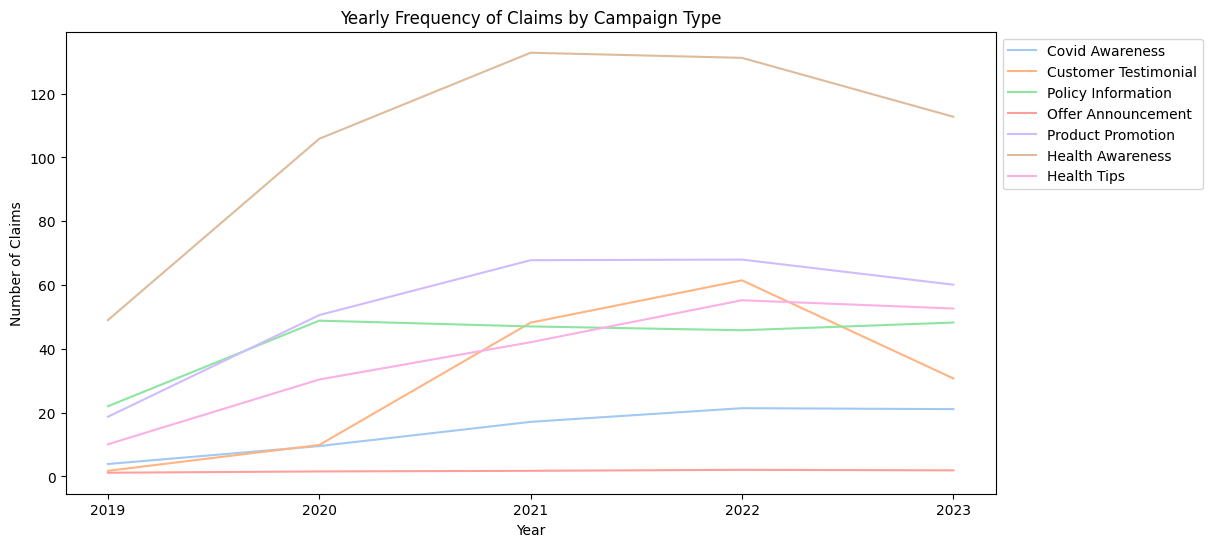

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(claim_freq_df, x='claim_year', y='num_claims', hue='campaign_type', palette='pastel', errorbar=None)

# adjusting plot params
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None)
plt.xlabel('Year')
plt.ylabel('Number of Claims')
plt.title('Yearly Frequency of Claims by Campaign Type', fontsize=12)
# setting x-axis to proper date range, removing half-intervals
ax.set_xticks(range(2019,2024))

plt.show()

#### Tracking Insight
1. Yearly frequency of claims by Campaign Type
    - The YoY frequency of 'Offer Announcement' is consistent with a low number of claims, while 'Health Awareness' has the highest. This seems to make one sense of logic clear, as 'Offer Announcement' makes up ~.375% of the Campaign Type distribution; 'Health Awareness' making up ~20.842% *(2nd behind 'Product Promotion')* and having the highest number of signups.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

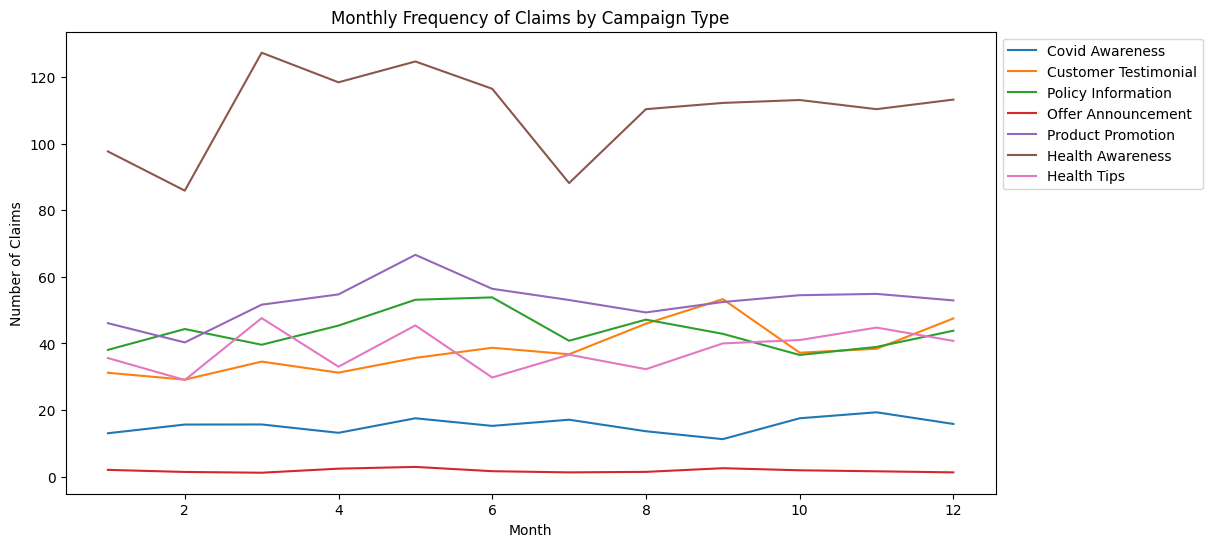

In [86]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(claim_freq_df, x='claim_month', y='num_claims', hue='campaign_type', errorbar=None)

# adjusting plot params
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None)
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.title('Monthly Frequency of Claims by Campaign Type', fontsize=12)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

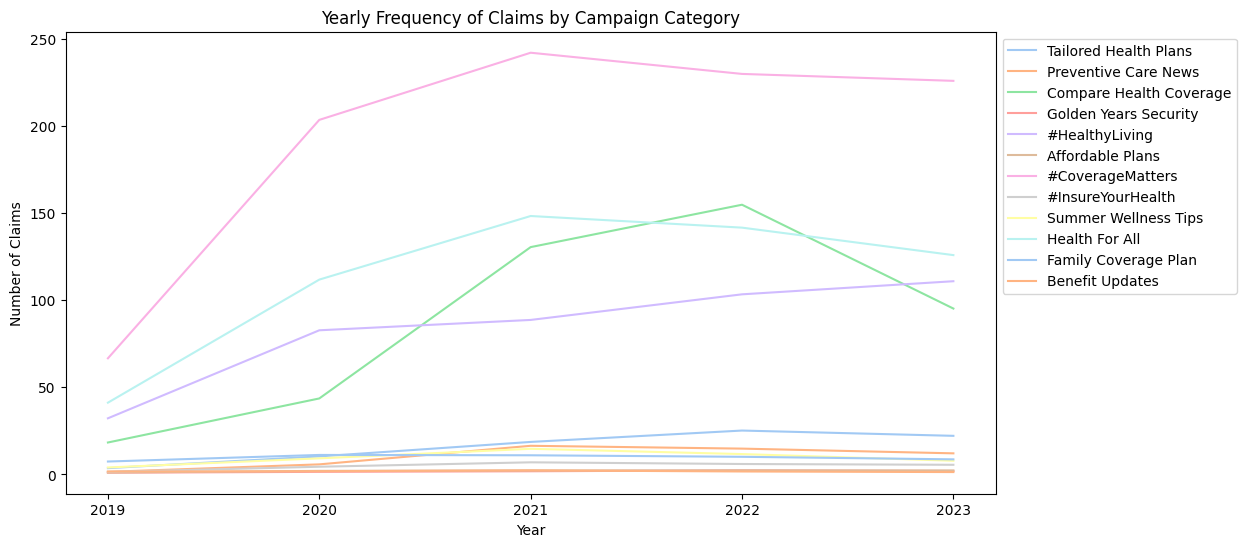

In [87]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(claim_freq_df, x='claim_year', y='num_claims', hue='campaign_category', palette='pastel', errorbar=None)

# adjusting plot params
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None)
plt.xlabel('Year')
plt.ylabel('Number of Claims')
plt.title('Yearly Frequency of Claims by Campaign Category', fontsize=12)
# setting x-axis to proper date range, removing half-intervals
ax.set_xticks(range(2019,2024))

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

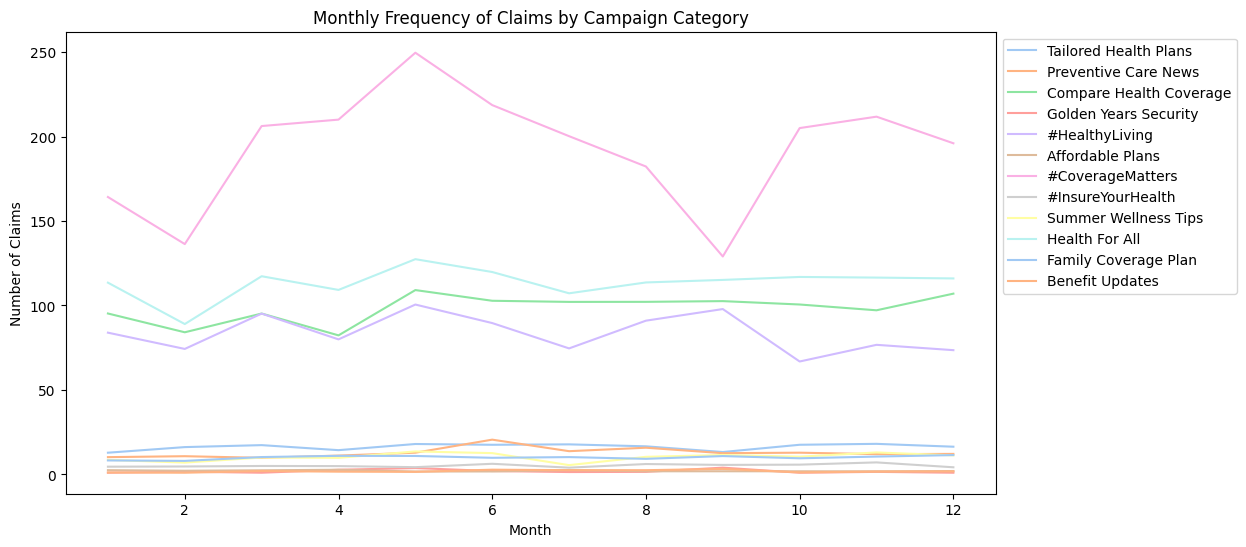

In [88]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(claim_freq_df, x='claim_month', y='num_claims', hue='campaign_category', palette='pastel', errorbar=None)

# adjusting plot params
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None)
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.title('Monthly Frequency of Claims by Campaign Category', fontsize=12)

plt.show()

In [89]:
# storing top 5 highest-signup campaigns
high_snup_camp = claim_freq_df.query("campaign_id in ['CAM031', 'CAM018', 'CAM030', 'CAM004', 'CAM006']")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

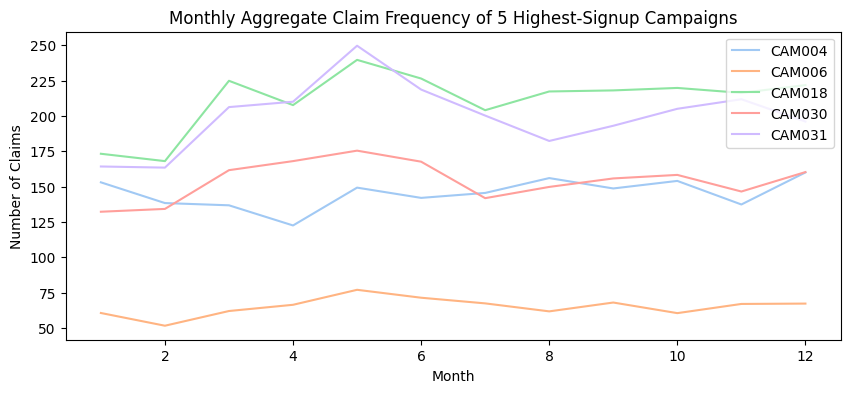

In [90]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(high_snup_camp, x='claim_month', y='num_claims', hue='campaign_id', palette='pastel', errorbar=None)

# adjusting plot params
sns.move_legend(ax, "upper right", title=None)
plt.title('Monthly Aggregate Claim Frequency of 5 Highest-Signup Campaigns')
plt.xlabel('Month')
plt.ylabel('Number of Claims')

plt.show()

In [91]:
# storing top 5 highest-cost campaigns
high_cost_camp = claim_freq_df.query("campaign_id in ['CAM003', 'CAM019', 'CAM020', 'CAM002', 'CAM021']")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

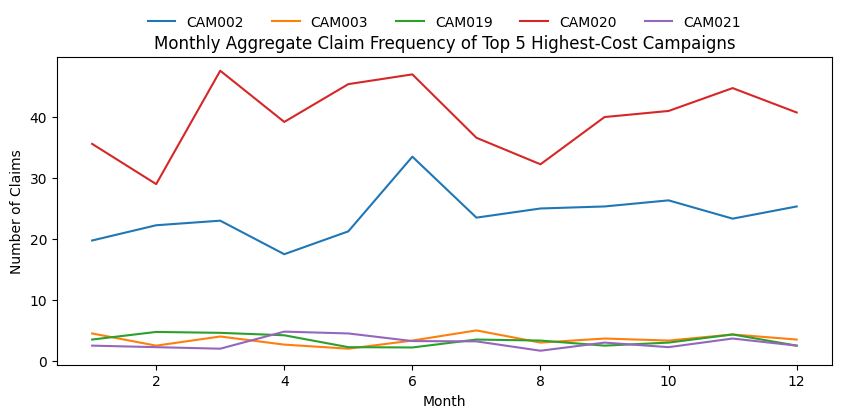

In [92]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(high_cost_camp, x='claim_month', y='num_claims', hue='campaign_id', errorbar=None)

# adjusting plot params
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1.05), ncol=5, title=None, frameon=False)
plt.title('Monthly Aggregate Claim Frequency of Top 5 Highest-Cost Campaigns')
plt.xlabel('Month')
plt.ylabel('Number of Claims')

plt.show()

In [93]:
# returns 5 lowest-cost campaigns 
campaign_cost_snups.sort_values(by=['cost'], ascending=False).tail()[['campaign_id','cost']]

,campaign_id,cost
22,CAM023,303.77
27,CAM028,300.13
11,CAM012,244.01
7,CAM008,223.09
13,CAM014,125.05


In [94]:
# creates df for 5 lowest-cost campaigns
lowest_cost_camp = claim_freq_df.query("campaign_id in ['CAM023','CAM028','CAM012','CAM008','CAM014']")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

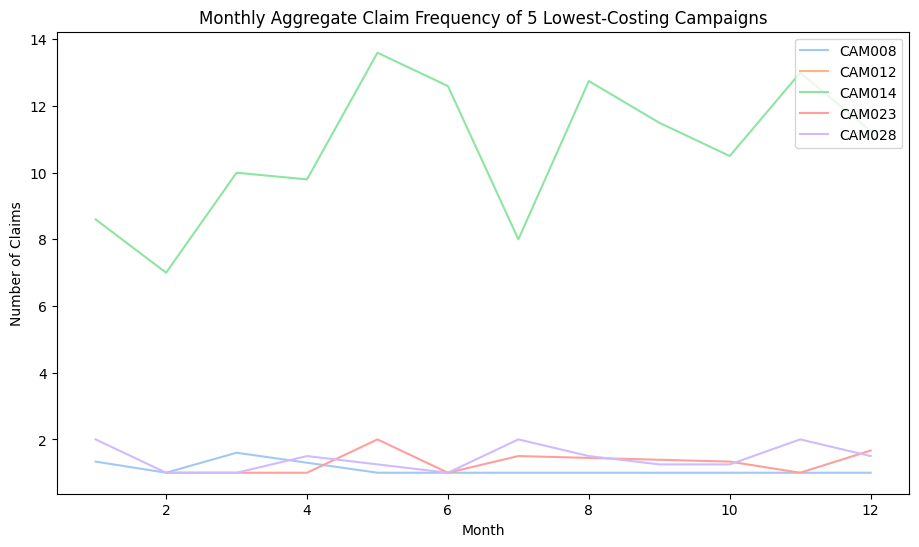

In [95]:
# plotting lowest-costing campaigns
fig, ax = plt.subplots(figsize=(11,6))
sns.lineplot(lowest_cost_camp, x='claim_month', y='num_claims', hue='campaign_id', palette='pastel', errorbar=None)

# adjusting plot params
sns.move_legend(ax, "upper right", title=None)
plt.title('Monthly Aggregate Claim Frequency of 5 Lowest-Costing Campaigns')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.show()

#### Collective Insights (Claims)
1. Highest-Signup campaigns fall below the average amount (\\$267.43) of claims made by customers.
2. The following Campaign Type:Category groupings have above average (> \\$267.43) claim amounts:
    - Customer Testimonial : Compare Health Coverage
    - Covid Awareness : Compare Health Coverage
    - Health Tips : Tailored Health Plans
    - Customer Testimonial : Preventive Care News
    - Covid Awareness : #InsureYourHealth
3.  Of the top 10 Campaign Type:Category groupings with the highest *total* claim amounts, 80% fall *below* the average claim-cost; those above:
    - Customer Testimonial : Compare Health Coverage *(Ranked 1st)*
    - Customer Testimonial : Preventive Care News *(Ranked 9th)*


***Note: MoM calculations/visualizations are aggregates of all years contained within datset (2019-2023)***
- There is a general uptick in claims throughout 2019-2021 amongst campaigns, likely due to the inception of the COVID-19 pandemic.
- There is an observable general increase of claims when going from Feb. to March & April to May, in campaigns. Within a more focused view on campaign categories, and the top 5 campaigns with the highest signups, there is an observable decrease during the May - July timeframe; interestingly, this pattern doesn't seem to hold true for the top 5 highest-costing campaigns.

<ins>**Tracking Recs.**</ins>
- Investigate why highest-costing campaigns don't seem to have decrease during May-July timeframe.

# Click Through Rate (CTR) & Signup Rate

## 1. CTR (clicks / impressions)
    - Campaign Type Differentiation
        - Campaign Category Drill-Down

In [96]:
# creating new df for grouped clicks & impressions
ctr_df = raw_campaigns_df.groupby(['campaign_type', 'campaign_category'])[['clicks', 'impressions']].sum()
ctr_df.head()

clicks  impressions
campaign_type   campaign_category                            
Covid Awareness #CoverageMatters         38585.0       265110
                #InsureYourHealth        24470.0       215500
                Affordable Plans         13808.5       242657
                Compare Health Coverage  17901.0       341765
                Golden Years Security        0.0        60940

In [97]:
# adding calculated variable for CTR
ctr_df['ctr'] = ctr_df.clicks/ctr_df.impressions

# validating calculation
ctr_df

clicks  impressions       ctr
campaign_type        campaign_category                                      
Covid Awareness      #CoverageMatters         38585.0       265110  0.145543
                     #InsureYourHealth        24470.0       215500  0.113550
                     Affordable Plans         13808.5       242657  0.056905
                     Compare Health Coverage  17901.0       341765  0.052378
                     Golden Years Security        0.0        60940  0.000000
                     Preventive Care News      3564.5        39003  0.091390
                     Summer Wellness Tips      4962.5        19761  0.251126
                     Tailored Health Plans    22565.0       330069  0.068364
Customer Testimonial #InsureYourHealth        18240.0       289290  0.063051
                     Compare Health Coverage  44160.0       140426  0.314472
                     Family Coverage Plan         0.0       653860  0.000000
                     Preventive Care News     47330.0       428100  0.110558
Health Awareness     Health For All           43453.0       117850  0.368714
                     Summer Wellness Tips     46506.0       222320  0.209185
                     Tailored Health Plans    34210.0       480790  0.071154
Health Tips          #HealthyLiving           32857.0       490821  0.066943
                     #InsureYourHealth         1050.5        33520  0.031339
                     Compare Health Coverage   1749.0        15970  0.109518
                     Preventive Care News      2316.5        42630  0.054340
                     Tailored Health Plans    12425.0       136160  0.091253
Offer Announcement   #HealthyLiving           41015.5       288407  0.142214
                     #InsureYourHealth         1339.5        45711  0.029304
                     Golden Years Security     5979.0       348510  0.017156
                     Tailored Health Plans    23370.0       451840  0.051722
Policy Information   #HealthyLiving           58195.0       593220  0.098100
                     Affordable Plans         27785.0        84850  0.327460
                     Benefit Updates          47785.0       155890  0.306530
                     Compare Health Coverage   4296.0        49659  0.086510
                     Health For All               0.0        20437  0.000000
                     Preventive Care News     79165.0       596980  0.132609
                     Summer Wellness Tips     48134.0       315285  0.152668
Product Promotion    #CoverageMatters         35655.0       446990  0.079767
                     #InsureYourHealth        29440.0       386223  0.076225
                     Benefit Updates           6360.0        88390  0.071954
                     Compare Health Coverage  25243.5       116890  0.215959
                     Family Coverage Plan         0.0       452680  0.000000
                     Golden Years Security        0.0        13480  0.000000
                     Health For All               0.0        32272  0.000000
                     Preventive Care News      4287.0        10255  0.418040
                     Summer Wellness Tips      4065.0        15644  0.259844

In [98]:
# calculate CTR avg.
ctr_avg = ctr_df.ctr.mean()

# create column for determining whether or not a CTR is above average
ctr_df['above_avg_ctr'] = ctr_df.ctr.apply(lambda x: 1 if x > ctr_avg else 0)

# return CTR avg.
print(f'CTR Avg.: {ctr_avg:.4f}')

CTR Avg.: 0.1184


In [99]:
ctr_df.sort_values(by=['ctr'], ascending=False)

,,clicks,impressions,ctr,above_avg_ctr
campaign_type,campaign_category,,,,
Product Promotion,Preventive Care News,4287.0,10255,0.418040,1
Health Awareness,Health For All,43453.0,117850,0.368714,1
Policy Information,Affordable Plans,27785.0,84850,0.327460,1
Customer Testimonial,Compare Health Coverage,44160.0,140426,0.314472,1
Policy Information,Benefit Updates,47785.0,155890,0.306530,1
Product Promotion,Summer Wellness Tips,4065.0,15644,0.259844,1
Covid Awareness,Summer Wellness Tips,4962.5,19761,0.251126,1
Product Promotion,Compare Health Coverage,25243.5,116890,0.215959,1
Health Awareness,Summer Wellness Tips,46506.0,222320,0.209185,1


#### Note
- 13 campaign type:category with above average CTRs

## 2. Signup Rate (Signups/Clicks)

In [100]:
# create df for number of signups of each campaign type:category
num_signups_df = customer_camp_df.groupby(['campaign_type', 'campaign_category'])[['signup_date']].count().rename(columns={'signup_date':'num_signups'})

In [101]:
# combining CTR with num_signups
ctr_df = ctr_df.merge(num_signups_df, how='inner', on=['campaign_type','campaign_category'])

In [102]:
# validating merge
ctr_df

clicks  impressions       ctr  \
campaign_type        campaign_category                                         
Covid Awareness      #CoverageMatters         38585.0       265110  0.145543   
                     #InsureYourHealth        24470.0       215500  0.113550   
                     Affordable Plans         13808.5       242657  0.056905   
                     Compare Health Coverage  17901.0       341765  0.052378   
                     Tailored Health Plans    22565.0       330069  0.068364   
Customer Testimonial #InsureYourHealth        18240.0       289290  0.063051   
                     Compare Health Coverage  44160.0       140426  0.314472   
                     Family Coverage Plan         0.0       653860  0.000000   
                     Preventive Care News     47330.0       428100  0.110558   
Health Awareness     Health For All           43453.0       117850  0.368714   
                     Summer Wellness Tips     46506.0       222320  0.209185   
                     Tailored Health Plans    34210.0       480790  0.071154   
Health Tips          #HealthyLiving           32857.0       490821  0.066943   
                     Tailored Health Plans    12425.0       136160  0.091253   
Offer Announcement   #HealthyLiving           41015.5       288407  0.142214   
                     Golden Years Security     5979.0       348510  0.017156   
                     Tailored Health Plans    23370.0       451840  0.051722   
Policy Information   #HealthyLiving           58195.0       593220  0.098100   
                     Affordable Plans         27785.0        84850  0.327460   
                     Benefit Updates          47785.0       155890  0.306530   
                     Preventive Care News     79165.0       596980  0.132609   
                     Summer Wellness Tips     48134.0       315285  0.152668   
Product Promotion    #CoverageMatters         35655.0       446990  0.079767   
                     #InsureYourHealth        29440.0       386223  0.076225   
                     Benefit Updates           6360.0        88390  0.071954   
                     Compare Health Coverage  25243.5       116890  0.215959   
                     Family Coverage Plan         0.0       452680  0.000000   
                     Health For All               0.0        32272  0.000000   

                                              above_avg_ctr  num_signups  
campaign_type        campaign_category                                    
Covid Awareness      #CoverageMatters                     1            1  
                     #InsureYourHealth                    0           46  
                     Affordable Plans                     0           51  
                     Compare Health Coverage              0            1  
                     Tailored Health Plans                0          965  
Customer Testimonial #InsureYourHealth                    0           24  
                     Compare Health Coverage              1         1546  
                     Family Coverage Plan                 0           73  
                     Preventive Care News                 0          586  
Health Awareness     Health For All                       1         3279  
                     Summer Wellness Tips                 1            2  
                     Tailored Health Plans                0          114  
Health Tips          #HealthyLiving                       0          971  
                     Tailored Health Plans                0            1  
Offer Announcement   #HealthyLiving                       1           11  
                     Golden Years Security                0           23  
                     Tailored Health Plans                0           27  
Policy Information   #HealthyLiving                       0         2745  
                     Affordable Plans                     1           12  
                     Benefit Updates                      1           1

In [103]:
# creating calculated variable for signup rate
ctr_df['signup_rate'] = ctr_df.num_signups / ctr_df.clicks 

In [104]:
top5_signups_df

,campaign_id,campaign_type,campaign_category,num_signups
0,CAM031,Product Promotion,#CoverageMatters,3534
1,CAM018,Health Awareness,Health For All,3279
2,CAM030,Policy Information,#HealthyLiving,2743
3,CAM004,Customer Testimonial,Compare Health Coverage,1546
4,CAM006,Product Promotion,Compare Health Coverage,1273


In [105]:
ctr_df.sort_values(by=['num_signups'], ascending=False)

,,clicks,impressions,ctr,above_avg_ctr,num_signups,signup_rate
campaign_type,campaign_category,,,,,,
Product Promotion,#CoverageMatters,35655.0,446990,0.079767,0,3535,0.099145
Health Awareness,Health For All,43453.0,117850,0.368714,1,3279,0.075461
Policy Information,#HealthyLiving,58195.0,593220,0.098100,0,2745,0.047169
Customer Testimonial,Compare Health Coverage,44160.0,140426,0.314472,1,1546,0.035009
Product Promotion,Compare Health Coverage,25243.5,116890,0.215959,1,1273,0.050429
Health Tips,#HealthyLiving,32857.0,490821,0.066943,0,971,0.029552
Covid Awareness,Tailored Health Plans,22565.0,330069,0.068364,0,965,0.042765
Customer Testimonial,Preventive Care News,47330.0,428100,0.110558,0,586,0.012381
Product Promotion,Health For All,0.0,32272,0.000000,0,266,inf


In [106]:
# proportion of above avg. CTRs
ctr_df.above_avg_ctr.value_counts(normalize=True)

above_avg_ctr
0    0.642857
1    0.357143
Name: proportion, dtype: float64

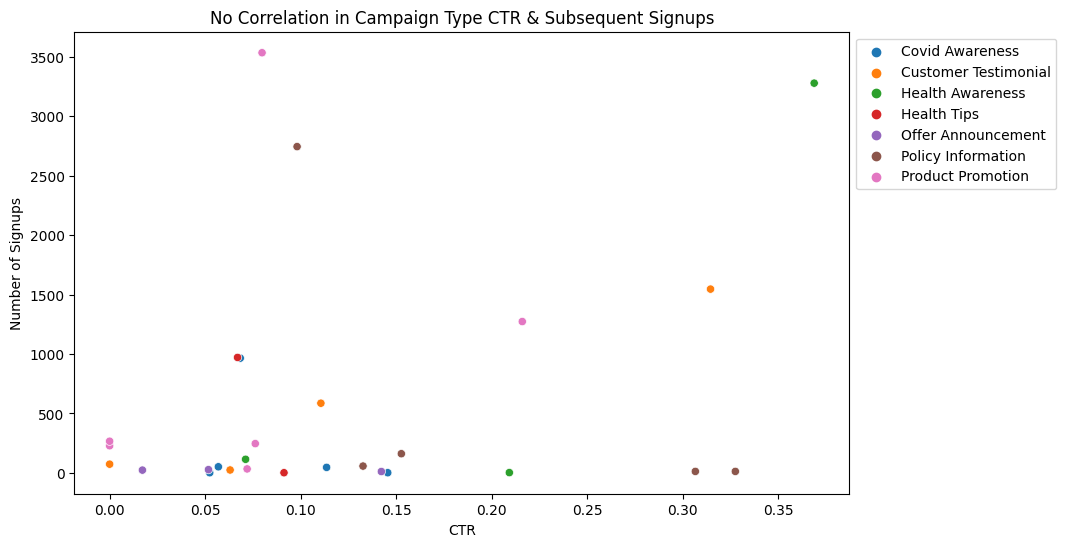

In [107]:
# assigning plot variables
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(ctr_df, x='ctr', y='num_signups', hue='campaign_type')

# adjusting plot params
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None)
plt.title('No Correlation in Campaign Type CTR & Subsequent Signups')
plt.xlabel('CTR')
plt.ylabel('Number of Signups')
plt.show()

#### Insights Click-Through Rate (CTR) | Signup Rate)
1. 60% (3/5) of the top 5 highest-signup campaigns, have above average CTRs.
    - CAM018, CAM004, CAM006
2. ~36% of campaign type:category groupings have above average CTRs.
3. There seems to be no correlation between CTR and the number of signups.
    - There is a focused concentration of signups for Campaign Types, within the CTR range of .05 &ndash; .15.